Learning Platform Student Engagement Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

In [3]:
## Data Loading and Initial Exploration
course_activity = pd.read_csv('/content/sample_data/course_activity.csv')
students = pd.read_csv('/content/sample_data/students.csv')
feedback = pd.read_csv('/content/sample_data/students.csv')

In [4]:
# Display the first few rows of each dataset
print("Course Activity Dataset:")
print(course_activity.head())
print("\nStudents Dataset:")
print(students.head())
print("\nFeedback Dataset:")
print(feedback.head())


Course Activity Dataset:
  Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202  05/01/2024                  90                  46.10
1       S001     DM101  28/01/2024                 155                  88.87
2       S001     UX303  28/01/2024                 177                  54.93
3       S002     PY202  03/02/2024                  45                  32.20
4       S002     UX303  15/03/2024                 119                  90.80

Students Dataset:
  Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24  Female    Kolkata     24/11/2023
1       S002  Student_2   32   Other    Chennai     27/02/2023
2       S003  Student_3   28   Other     Mumbai     13/01/2023
3       S004  Student_4   25  Female  Bangalore     21/05/2023
4       S005  Student_5   24   Other      Delhi     06/05/2023

Feedback Dataset:
  Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24

In [5]:
# Check the shapes of the datasets
print("\nDataset Shapes:")
print(f"Course Activity: {course_activity.shape}")
print(f"Students: {students.shape}")
print(f"Feedback: {feedback.shape}")


Dataset Shapes:
Course Activity: (659, 5)
Students: (100, 6)
Feedback: (100, 6)


## Data Cleaning and Preparation


In [6]:
# Check for missing values
print("\nMissing Values:")
print(course_activity.isnull().sum())
print(students.isnull().sum())
print(feedback.isnull().sum())



Missing Values:
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64


In [7]:
# Convert date columns to datetime format
course_activity['Date'] = pd.to_datetime(course_activity['Date'], format='%d/%m/%Y')
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], format='%d/%m/%Y')

In [8]:
# Create month and day columns for time-based analysis
course_activity['Month'] = course_activity['Date'].dt.month
course_activity['Day'] = course_activity['Date'].dt.day_name()

In [9]:
# Calculate days since enrollment for each activity
activity_with_student = pd.merge(course_activity, students[['Student_ID', 'Enrolment_Date']], on='Student_ID', how='left')
activity_with_student['Days_Since_Enrollment'] = (activity_with_student['Date'] - activity_with_student['Enrolment_Date']).dt.days

In [10]:
# Create a new column for completion status (below 50%, 50-80%, above 80%)
activity_with_student['Completion_Status'] = pd.cut(
    activity_with_student['Completion_Percentage'],
    bins=[0, 50, 80, 100],
    labels=['Low (<50%)', 'Medium (50-80%)', 'High (>80%)']
)

In [11]:
# Aggregate student activity data
student_activity_summary = course_activity.groupby('Student_ID').agg(
    total_sessions=('Date', 'count'),
    avg_time_spent=('Time_Spent_Minutes', 'mean'),
    avg_completion=('Completion_Percentage', 'mean'),
    total_time_spent=('Time_Spent_Minutes', 'sum')
).reset_index()


In [12]:
# Merge with student demographic data
student_activity_summary = pd.merge(student_activity_summary, students, on='Student_ID', how='left')

In [13]:
# Create course-level summary
course_summary = course_activity.groupby('Course_ID').agg(
    sessions=('Date', 'count'),
    unique_students=('Student_ID', 'nunique'),
    avg_time_spent=('Time_Spent_Minutes', 'mean'),
    avg_completion=('Completion_Percentage', 'mean')
).reset_index()

In [15]:
# Reload the feedback data, ensuring you use the correct file path.
feedback = pd.read_csv('/content/sample_data/feedback.csv')

# Merge feedback with course activity data
feedback_with_activity = pd.merge(feedback, course_activity, on=['Student_ID', 'Course_ID'], how='inner')

In [16]:
# Ensure we have unique feedback per student-course combination
unique_feedback = feedback.drop_duplicates(subset=['Student_ID', 'Course_ID'])

## Exploratory Data Analysis

In [17]:
# 1. Student demographics analysis
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Count')

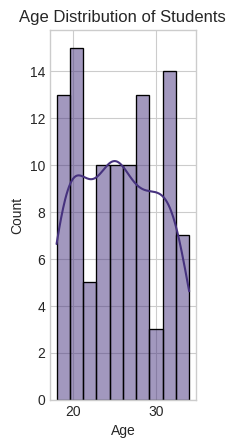

In [18]:
# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(students['Age'], bins=10, kde=True)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Count')


Text(0.5, 1.0, 'Gender Distribution')

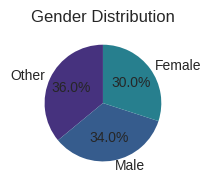

In [19]:
# Gender distribution
plt.subplot(1, 3, 2)
gender_counts = students['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')


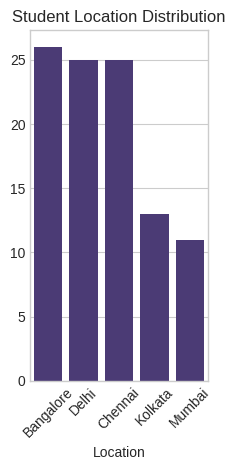

In [20]:
# Location distribution
plt.subplot(1, 3, 3)
location_counts = students['Location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Student Location Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# 2. Course engagement analysis
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(0.0, 100.0)

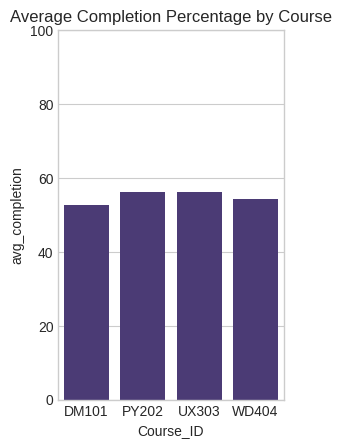

In [22]:
# Average completion percentage by course
plt.subplot(1, 2, 1)
sns.barplot(x='Course_ID', y='avg_completion', data=course_summary)
plt.title('Average Completion Percentage by Course')
plt.ylim(0, 100)

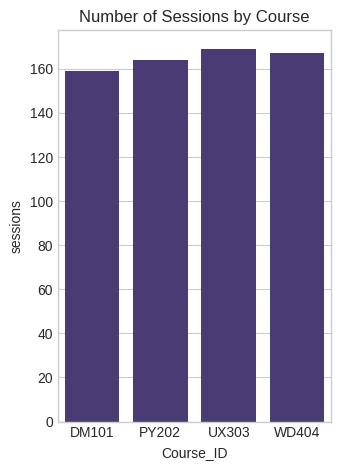

In [23]:
# Number of sessions by course
plt.subplot(1, 2, 2)
sns.barplot(x='Course_ID', y='sessions', data=course_summary)
plt.title('Number of Sessions by Course')
plt.tight_layout()
plt.show()

In [24]:
# 3. Time spent analysis
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'Time Spent (Minutes)')

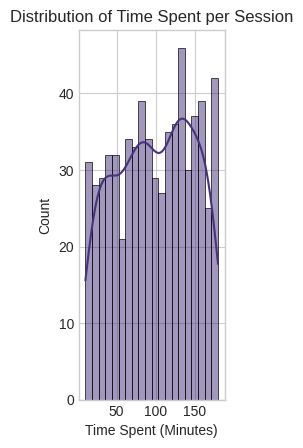

In [25]:
# Distribution of time spent
plt.subplot(1, 3, 1)
sns.histplot(course_activity['Time_Spent_Minutes'], bins=20, kde=True)
plt.title('Distribution of Time Spent per Session')
plt.xlabel('Time Spent (Minutes)')


Text(0, 0.5, 'Avg Time (Minutes)')

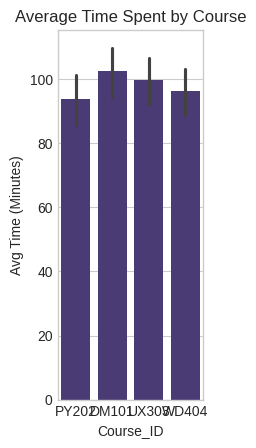

In [27]:
# Average time spent by course
plt.subplot(1, 3, 2)
sns.barplot(x='Course_ID', y='Time_Spent_Minutes', data=course_activity)
plt.title('Average Time Spent by Course')
plt.ylabel('Avg Time (Minutes)')

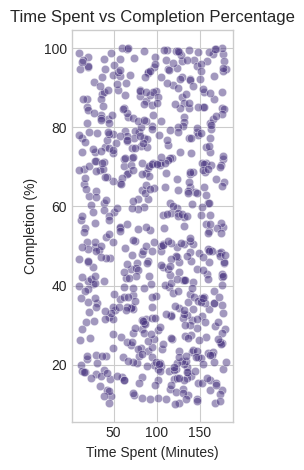

In [26]:
# Time spent vs completion percentage
plt.subplot(1, 3, 3)
sns.scatterplot(x='Time_Spent_Minutes', y='Completion_Percentage', data=course_activity, alpha=0.5)
plt.title('Time Spent vs Completion Percentage')
plt.xlabel('Time Spent (Minutes)')
plt.ylabel('Completion (%)')
plt.tight_layout()
plt.show()

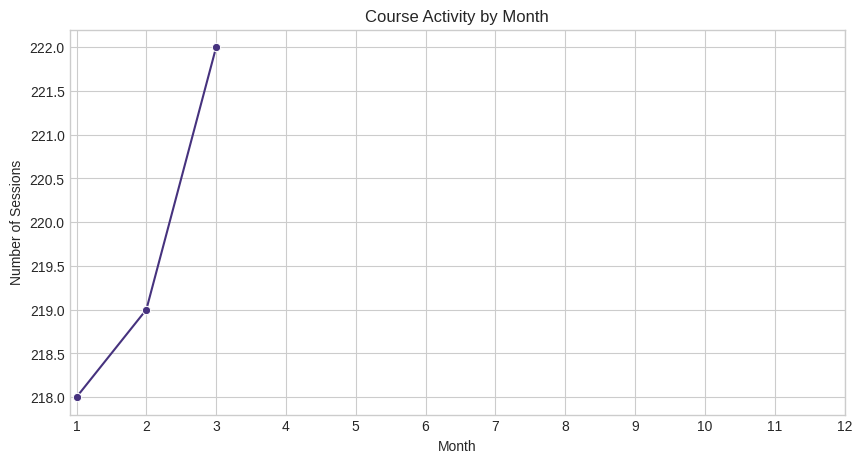

In [28]:
# 4. Course activity over time
monthly_activity = course_activity.groupby('Month').size().reset_index(name='Sessions')
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Sessions', data=monthly_activity, marker='o')
plt.title('Course Activity by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [29]:
# 5. Daily activity patterns
daily_activity = course_activity.groupby('Day').size().reset_index(name='Sessions')
# Reorder days of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity['Day'] = pd.Categorical(daily_activity['Day'], categories=day_order, ordered=True)
daily_activity = daily_activity.sort_values('Day')


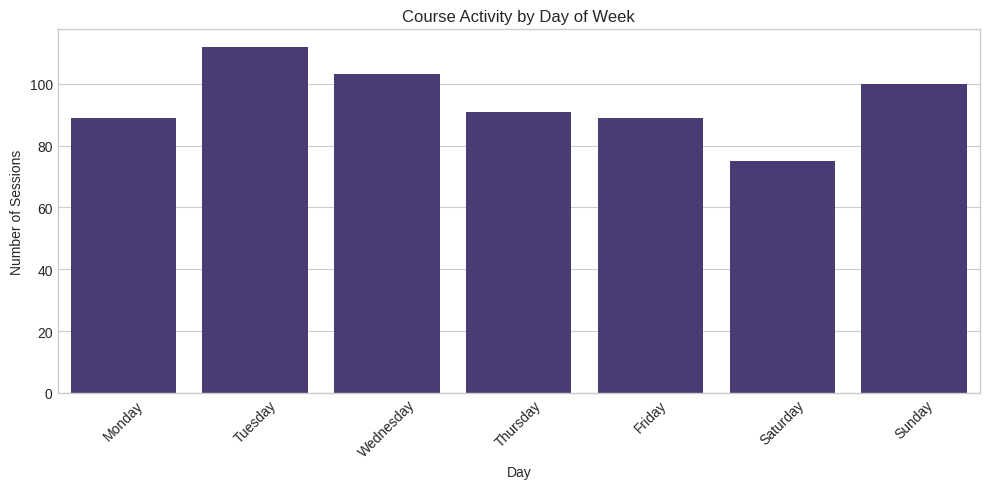

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Day', y='Sessions', data=daily_activity)
plt.title('Course Activity by Day of Week')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
# 6. Feedback analysis
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'Rating (1-5)')

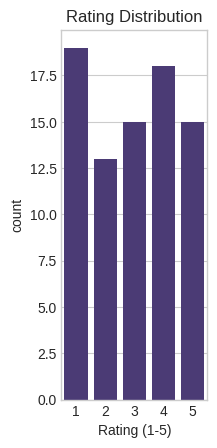

In [32]:
# Rating distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Rating', data=feedback)
plt.title('Rating Distribution')
plt.xlabel('Rating (1-5)')

(0.0, 5.0)

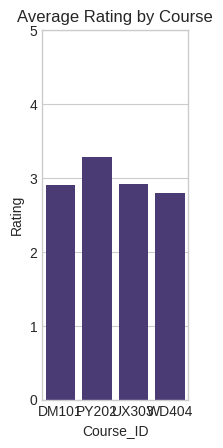

In [33]:
# Average rating by course
avg_rating_by_course = feedback.groupby('Course_ID')['Rating'].mean().reset_index()
plt.subplot(1, 3, 2)
sns.barplot(x='Course_ID', y='Rating', data=avg_rating_by_course)
plt.title('Average Rating by Course')
plt.ylim(0, 5)

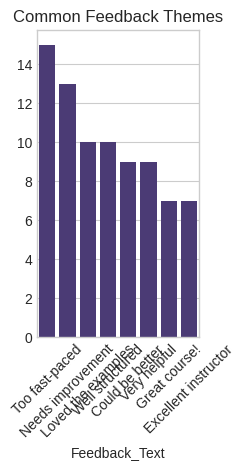

In [34]:
# Feedback text analysis
feedback_counts = feedback['Feedback_Text'].value_counts()
plt.subplot(1, 3, 3)
sns.barplot(x=feedback_counts.index, y=feedback_counts.values)
plt.title('Common Feedback Themes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


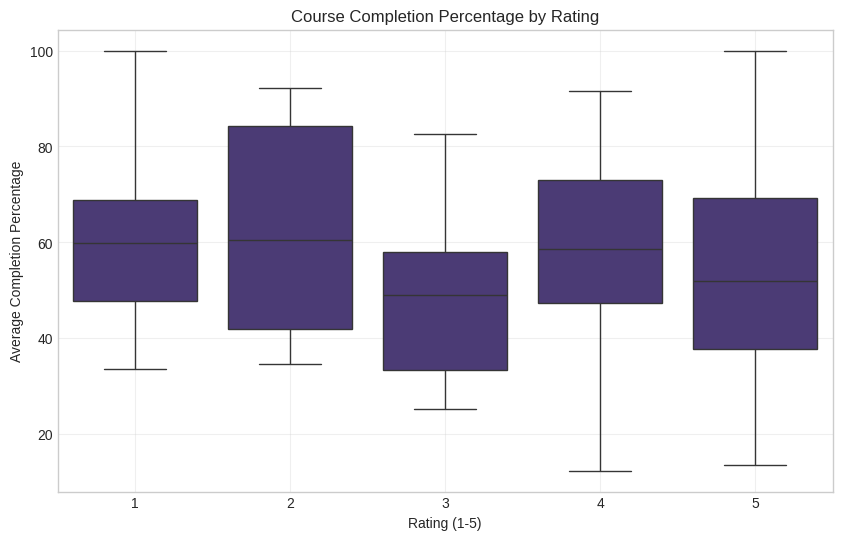

In [35]:
# 7. Correlation between course completion and feedback
feedback_completion = pd.merge(feedback,
                              course_activity.groupby(['Student_ID', 'Course_ID'])['Completion_Percentage'].mean().reset_index(),
                              on=['Student_ID', 'Course_ID'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Completion_Percentage', data=feedback_completion)
plt.title('Course Completion Percentage by Rating')
plt.xlabel('Rating (1-5)')
plt.ylabel('Average Completion Percentage')
plt.grid(True, alpha=0.3)
plt.show()

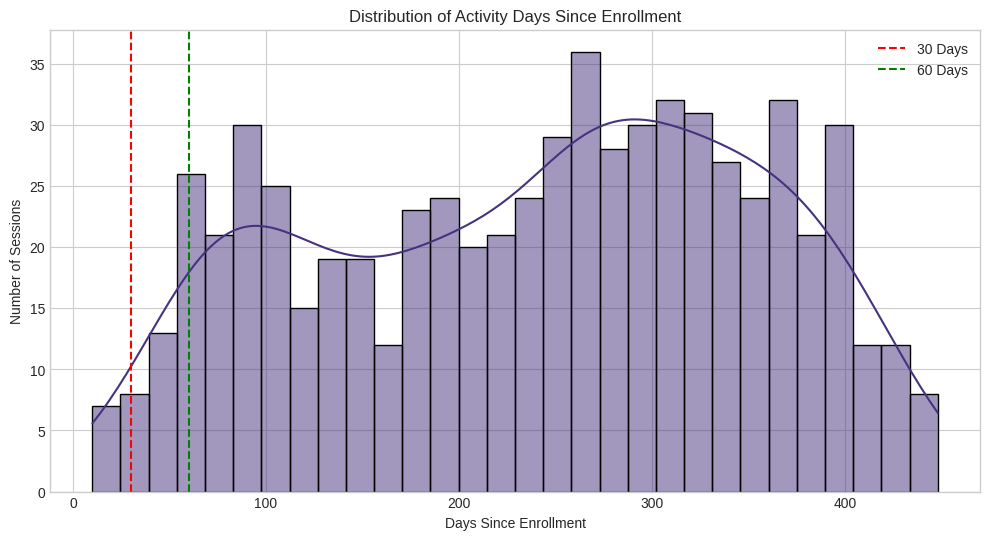

In [36]:
# 8. Student engagement after enrollment
plt.figure(figsize=(12, 6))
sns.histplot(activity_with_student['Days_Since_Enrollment'], bins=30, kde=True)
plt.title('Distribution of Activity Days Since Enrollment')
plt.xlabel('Days Since Enrollment')
plt.ylabel('Number of Sessions')
plt.axvline(x=30, color='red', linestyle='--', label='30 Days')
plt.axvline(x=60, color='green', linestyle='--', label='60 Days')
plt.legend()
plt.show()

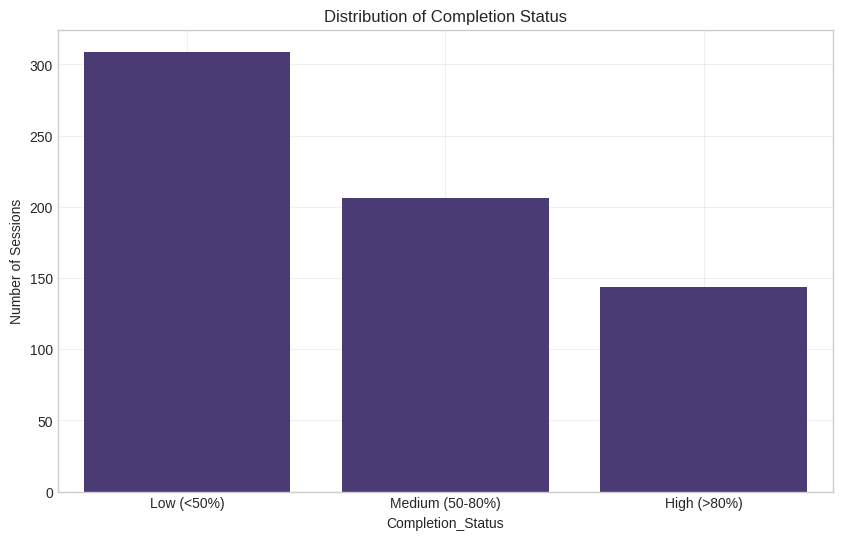

In [37]:
# 9. Completion status distribution
plt.figure(figsize=(10, 6))
completion_counts = activity_with_student['Completion_Status'].value_counts()
sns.barplot(x=completion_counts.index, y=completion_counts.values)
plt.title('Distribution of Completion Status')
plt.ylabel('Number of Sessions')
plt.grid(True, alpha=0.3)
plt.show()


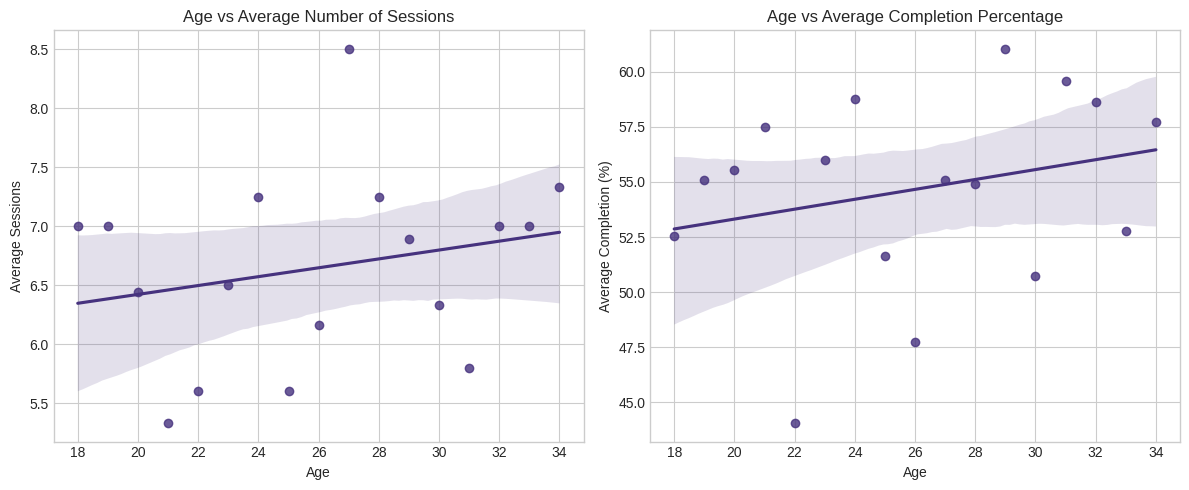

In [38]:
# 10. Age vs Engagement Analysis
age_engagement = student_activity_summary.groupby('Age').agg(
    avg_sessions=('total_sessions', 'mean'),
    avg_completion=('avg_completion', 'mean')
).reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='Age', y='avg_sessions', data=age_engagement)
plt.title('Age vs Average Number of Sessions')
plt.xlabel('Age')
plt.ylabel('Average Sessions')
plt.subplot(1, 2, 2)
sns.regplot(x='Age', y='avg_completion', data=age_engagement)
plt.title('Age vs Average Completion Percentage')
plt.xlabel('Age')
plt.ylabel('Average Completion (%)')
plt.tight_layout()
plt.show()

## Advanced Analysis

In [39]:
# 1. Identify students at risk (low engagement, low completion)
at_risk_students = student_activity_summary[
    (student_activity_summary['avg_completion'] < 40) &
    (student_activity_summary['total_sessions'] < student_activity_summary['total_sessions'].median())
]
print("\nStudents at Risk (Low Engagement & Completion):")
print(f"Number of at-risk students: {len(at_risk_students)}")
print(at_risk_students[['Student_ID', 'Name', 'total_sessions', 'avg_completion']].head())


Students at Risk (Low Engagement & Completion):
Number of at-risk students: 5
   Student_ID         Name  total_sessions  avg_completion
24       S025   Student_25               4       34.265000
30       S031   Student_31               6       37.708333
54       S055   Student_55               4       32.907500
81       S082   Student_82               5       34.240000
99       S100  Student_100               5       35.188000


In [40]:
# 2. Top performing students
top_students = student_activity_summary[
    (student_activity_summary['avg_completion'] > 75) &
    (student_activity_summary['total_sessions'] > student_activity_summary['total_sessions'].median())
]
print("\nTop Performing Students:")
print(f"Number of top students: {len(top_students)}")
print(top_students[['Student_ID', 'Name', 'total_sessions', 'avg_completion']].head())


Top Performing Students:
Number of top students: 1
   Student_ID        Name  total_sessions  avg_completion
84       S085  Student_85               9           80.59


In [42]:
# 3. Course difficulty analysis (based on completion rates)
course_difficulty = course_activity.groupby('Course_ID').agg(
    avg_completion=('Completion_Percentage', 'mean'),
    completion_std=('Completion_Percentage', 'std'),
    low_completion_count=('Completion_Percentage', lambda x: (x < 50).sum()),
    high_completion_count=('Completion_Percentage', lambda x: (x > 80).sum())
)
course_difficulty['difficulty_score'] = (100 - course_difficulty['avg_completion']) * (course_difficulty['low_completion_count'] / course_difficulty['high_completion_count'])
course_difficulty = course_difficulty.sort_values('difficulty_score', ascending=False)

print("\nCourse Difficulty Analysis:")
print(course_difficulty)


Course Difficulty Analysis:
           avg_completion  completion_std  low_completion_count  \
Course_ID                                                         
DM101           52.619874       25.418519                    83   
WD404           54.135329       26.323967                    82   
UX303           56.159172       26.278009                    70   
PY202           56.104329       27.156989                    74   

           high_completion_count  difficulty_score  
Course_ID                                           
DM101                         33        119.168195  
WD404                         36        104.469528  
UX303                         35         87.681657  
PY202                         40         81.206991  


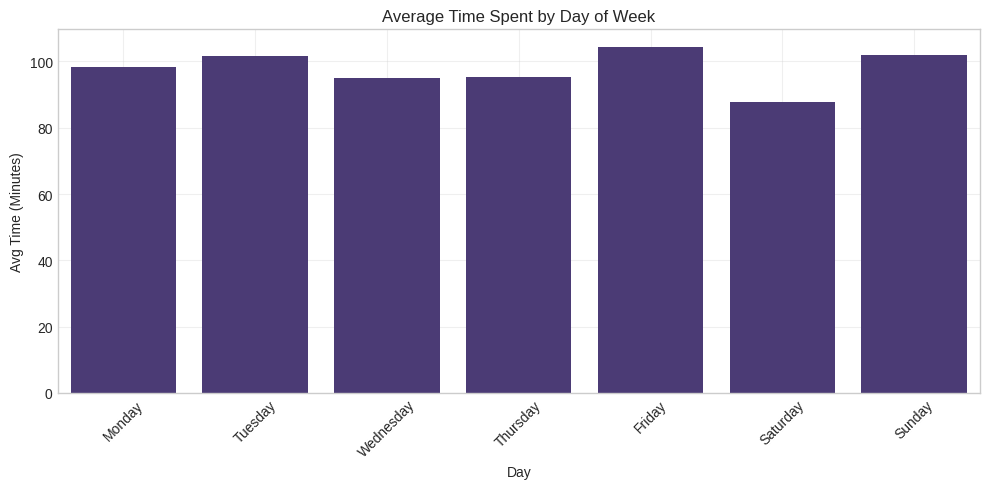

In [43]:
# 4. Session pattern analysis
# Average time spent by day of week
time_by_day = course_activity.groupby('Day')['Time_Spent_Minutes'].mean().reset_index()
time_by_day['Day'] = pd.Categorical(time_by_day['Day'], categories=day_order, ordered=True)
time_by_day = time_by_day.sort_values('Day')

plt.figure(figsize=(10, 5))
sns.barplot(x='Day', y='Time_Spent_Minutes', data=time_by_day)
plt.title('Average Time Spent by Day of Week')
plt.ylabel('Avg Time (Minutes)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

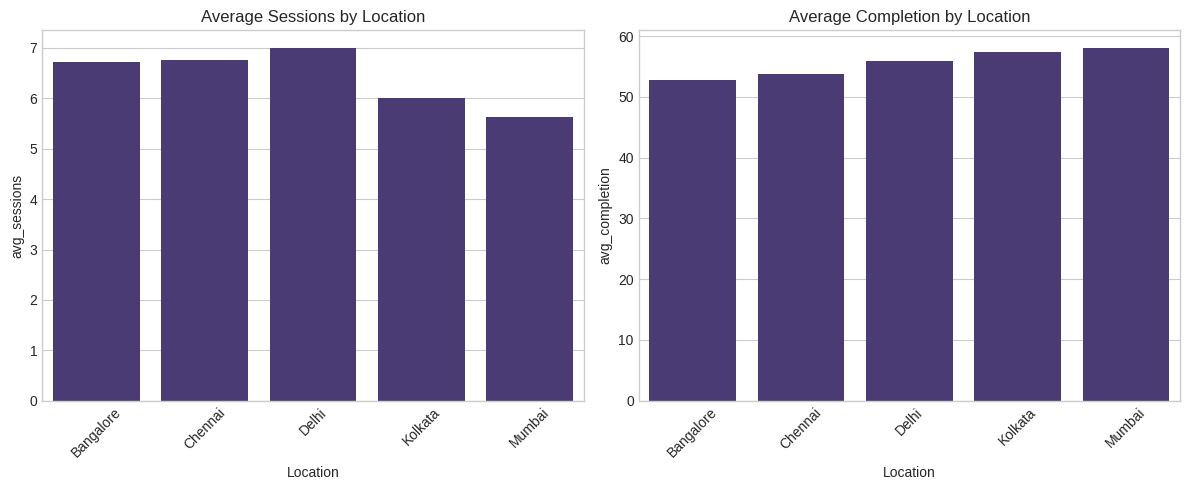

In [44]:
# 5. Engagement by location
location_engagement = student_activity_summary.groupby('Location').agg(
    avg_sessions=('total_sessions', 'mean'),
    avg_completion=('avg_completion', 'mean'),
    avg_time=('avg_time_spent', 'mean'),
    student_count=('Student_ID', 'count')
).reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Location', y='avg_sessions', data=location_engagement)
plt.title('Average Sessions by Location')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Location', y='avg_completion', data=location_engagement)
plt.title('Average Completion by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# 6. Analyze feedback sentiment by course
course_feedback = feedback.groupby('Course_ID').agg(
    avg_rating=('Rating', 'mean'),
    rating_count=('Rating', 'count')
).reset_index()

In [47]:
# Join with common feedback themes
feedback_themes = pd.DataFrame(feedback.groupby(['Course_ID', 'Feedback_Text']).size()).reset_index()
feedback_themes.columns = ['Course_ID', 'Feedback_Text', 'count']  # Rename the columns
pivot_feedback = feedback_themes.pivot_table(index='Course_ID', columns='Feedback_Text', values='count', fill_value=0)
course_feedback_detailed = pd.merge(course_feedback, pivot_feedback.reset_index(), on='Course_ID')

print("\nDetailed Course Feedback Analysis:")
print(course_feedback_detailed)


Detailed Course Feedback Analysis:
  Course_ID  avg_rating  rating_count  Could be better  Excellent instructor  \
0     DM101    2.900000            30              3.0                   3.0   
1     PY202    3.277778            18              3.0                   2.0   
2     UX303    2.923077            13              1.0                   1.0   
3     WD404    2.789474            19              2.0                   1.0   

   Great course!  Loved the examples  Needs improvement  Too fast-paced  \
0            0.0                 5.0                4.0             8.0   
1            2.0                 2.0                3.0             1.0   
2            1.0                 1.0                5.0             3.0   
3            4.0                 2.0                1.0             3.0   

   Very helpful  Well structured  
0           3.0              4.0  
1           3.0              2.0  
2           0.0              1.0  
3           3.0              3.0  


## Key Insights and Recommendations

In [48]:
print("\n=== KEY INSIGHTS ===")


=== KEY INSIGHTS ===


In [50]:
# 1. Course Completion Rates
avg_completion = course_activity['Completion_Percentage'].mean()
print(f"1. Average completion rate across all courses: {avg_completion:.2f}%")
for course_id, avg_comp in course_summary[['Course_ID', 'avg_completion']].values:
    print(f"   - {course_id}: {avg_comp:.2f}%")
# 2. Engagement Patterns
print("\n2. Engagement Patterns:")
print(f"   - Average sessions per student: {student_activity_summary['total_sessions'].mean():.2f}")
print(f"   - Average time spent per session: {course_activity['Time_Spent_Minutes'].mean():.2f} minutes")
print(f"   - Most active days: {daily_activity.sort_values('Sessions', ascending=False)['Day'].iloc[0]}")

# 3. Feedback Summary
print("\n3. Feedback Summary:")
print(f"   - Average rating across all courses: {feedback['Rating'].mean():.2f}/5")
print(f"   - Most common feedback: {feedback['Feedback_Text'].value_counts().index[0]}")
print(f"   - Course with highest rating: {avg_rating_by_course.sort_values('Rating', ascending=False)['Course_ID'].iloc[0]}")

# 4. At-Risk Students
print(f"\n4. At-Risk Students: {len(at_risk_students)} students showing low engagement and completion")

# 5. Course Difficulty
print("\n5. Course Difficulty:")
course_difficulty = course_difficulty.reset_index()
for course_id, score in course_difficulty[['Course_ID', 'difficulty_score']].values:
    print(f"   - {course_id}: Difficulty Score {score:.2f}")

# Generate recommendations
print("\n=== RECOMMENDATIONS ===")
print("1. Engagement Improvement:")
print("   - Implement engagement boosting strategies for at-risk students")
print("   - Create personalized learning paths based on completion patterns")

print("\n2. Course Improvements:")
if 'Too fast-paced' in feedback['Feedback_Text'].value_counts().index[:3]:
    print("   - Adjust pacing for courses with 'Too fast-paced' feedback")

print("   - Review and potentially restructure courses with low completion rates")
print("   - Enhance content for courses with below-average engagement time")

print("\n3. Student Support:")
print("   - Develop targeted support for students from locations with lower engagement")
print("   - Implement early intervention system for students showing declining completion rates")

print("\n4. Platform Optimization:")
print("   - Focus on improving mobile accessibility for peak usage times")
print("   - Introduce periodic engagement activities to maintain student interest")
print("   - Consider gamification elements to boost completion rates")

# Save the cleaned and processed data
cleaned_data = {
    'activity_with_student': activity_with_student,
    'student_activity_summary': student_activity_summary,
    'course_summary': course_summary,
    'feedback_with_activity': feedback_with_activity
}

# In a real scenario, we would save these to CSV files
# For the assignment, we'll just display summaries
for name, data in cleaned_data.items():
    print(f"\n{name} summary:")
    print(data.describe())

1. Average completion rate across all courses: 54.78%
   - DM101: 52.62%
   - PY202: 56.10%
   - UX303: 56.16%
   - WD404: 54.14%

2. Engagement Patterns:
   - Average sessions per student: 6.59
   - Average time spent per session: 98.11 minutes
   - Most active days: Tuesday

3. Feedback Summary:
   - Average rating across all courses: 2.96/5
   - Most common feedback: Too fast-paced
   - Course with highest rating: PY202

4. At-Risk Students: 5 students showing low engagement and completion

5. Course Difficulty:
   - DM101: Difficulty Score 119.17
   - WD404: Difficulty Score 104.47
   - UX303: Difficulty Score 87.68
   - PY202: Difficulty Score 81.21

=== RECOMMENDATIONS ===
1. Engagement Improvement:
   - Implement engagement boosting strategies for at-risk students
   - Create personalized learning paths based on completion patterns

2. Course Improvements:
   - Adjust pacing for courses with 'Too fast-paced' feedback
   - Review and potentially restructure courses with low compl